Extracting content/cifar-10-python.tar.gz to content
Files already downloaded and verified


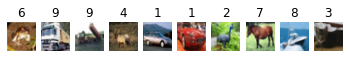

In [1]:

from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

trainset = datasets.CIFAR10("content", train=True,  download=True)
testset = datasets.CIFAR10("content", train = False, download=True)

for j in range(10):
  image, class_num = trainset[j]
  plt.subplot(1, 10 ,j+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(class_num))


In [2]:
# Validation function. Don't change this code

import torch.optim as optim

def validate(model,testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  
  return correct / total  

In [3]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TwoLayerFCN(nn.Module):

    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        # Define two layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.layer1 = nn.Linear(3072, 1024)
        self.layer2 = nn.Linear(1024, class_nums)

        # Put your code here

    def forward(self, x):
        # Preprocess image, remember that first dimension is batch dimension !
        x_flatten = torch.flatten(torch.Tensor(x), start_dim=1)
        # Perform forward pass;
        # Use layers defined in constructor;
        # Add activation function on your choice: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
        
        self.activation = nn.ReLU()

        # Put your code here

        scores = self.layer2(self.activation(self.layer1(x_flatten)))

        # return raw output of last layer
        return scores


In [4]:
# Prepare the data
transform=transforms.Compose([
                              transforms.ToTensor(), # Pil Image to Pytorch tensor
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transforms%20normalize#torchvision.transforms.Normalize
                              ])

trainset.transform = transform
testset.transform = transform

train_loader = DataLoader(trainset, batch_size = 512, shuffle = True)
test_loader = DataLoader(testset, batch_size = 256, shuffle = False)



In [5]:
# Train the model
# You may change loss function, learning rate and number of epochs

model = TwoLayerFCN(10) 
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

for epoch in range(100):
  for img_batch, labels_batch in train_loader:
    
    optimizer.zero_grad()

    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here

    loss.backward()
    optimizer.step()

  accuracy = validate(model,test_loader)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
  

Epoch 0 Loss 2.12 Accuracy 0.27
Epoch 1 Loss 2.02 Accuracy 0.31
Epoch 2 Loss 1.97 Accuracy 0.33
Epoch 3 Loss 1.90 Accuracy 0.35
Epoch 4 Loss 1.92 Accuracy 0.36
Epoch 5 Loss 1.92 Accuracy 0.37
Epoch 6 Loss 1.76 Accuracy 0.38
Epoch 7 Loss 1.76 Accuracy 0.38
Epoch 8 Loss 1.78 Accuracy 0.38
Epoch 9 Loss 1.85 Accuracy 0.39
Epoch 10 Loss 1.84 Accuracy 0.39
Epoch 11 Loss 1.77 Accuracy 0.40
Epoch 12 Loss 1.69 Accuracy 0.40
Epoch 13 Loss 1.66 Accuracy 0.41
Epoch 14 Loss 1.72 Accuracy 0.41
Epoch 15 Loss 1.71 Accuracy 0.42
Epoch 16 Loss 1.73 Accuracy 0.42
Epoch 17 Loss 1.66 Accuracy 0.42
Epoch 18 Loss 1.62 Accuracy 0.43
Epoch 19 Loss 1.68 Accuracy 0.43
Epoch 20 Loss 1.64 Accuracy 0.43
Epoch 21 Loss 1.65 Accuracy 0.44
Epoch 22 Loss 1.62 Accuracy 0.44
Epoch 23 Loss 1.64 Accuracy 0.44
Epoch 24 Loss 1.58 Accuracy 0.44
Epoch 25 Loss 1.64 Accuracy 0.44
Epoch 26 Loss 1.64 Accuracy 0.44
Epoch 27 Loss 1.53 Accuracy 0.45
Epoch 28 Loss 1.69 Accuracy 0.45
Epoch 29 Loss 1.64 Accuracy 0.45
Epoch 30 Loss 1.68 A